This notebook creates a heatmap of differential lipids

In [1]:
import pandas, seaborn, matplotlib

# read variables: core, and only conditions

In [2]:
all_features = []
k_colors = []

# core
df = pandas.read_csv('core.csv', sep='\t')
for index, row in df.iterrows():
    feature = '{}_{}'.format(row['m/z'], row['RT'])
    all_features.append(feature)
    k_colors.append('gold')
print(len(all_features))

# only epi
df = pandas.read_csv('only_epi.csv', sep='\t')
for index, row in df.iterrows():
    feature = '{}_{}'.format(row['m/z'], row['RT'])
    all_features.append(feature)
    k_colors.append('tab:orange')
print(len(all_features))

# only nor
df = pandas.read_csv('only_nor.csv', sep='\t')
for index, row in df.iterrows():
    feature = '{}_{}'.format(row['m/z'], row['RT'])
    all_features.append(feature)
    k_colors.append('tab:purple')
print(len(all_features))

# only mix
df = pandas.read_csv('only_mix.csv', sep='\t')
for index, row in df.iterrows():
    feature = '{}_{}'.format(row['m/z'], row['RT'])
    all_features.append(feature)
    k_colors.append('tab:red')
print(len(all_features))

print(all_features[:5])

64
66
76
90
['602.368805718695_5.45685', '384.325973483607_4.54058333333333', '554.458380061297_7.48356666666667', '600.262199185733_4.31853333333333', '490.867897017067_7.5921']


In [3]:
# read fold-changes for working variables: in epi, nor and mix

In [4]:
heatmap_df = pandas.DataFrame()

In [5]:
df = pandas.read_csv('5 µM epi.4.quant.all.csv', sep='\t', index_col=0)
sub = df.loc[all_features, 'log2FC']
heatmap_df['epi'] = sub

In [6]:
df = pandas.read_csv('5 µM nor.4.quant.all.csv', sep='\t', index_col=0)
sub = df.loc[all_features, 'log2FC']
heatmap_df['nor'] = sub

In [7]:
df = pandas.read_csv('5 µM epi:nor.4.quant.all.csv', sep='\t', index_col=0)
sub = df.loc[all_features, 'log2FC']
heatmap_df['mix'] = sub

In [8]:
heatmap_df

,epi,nor,mix
ID,,,
602.368805718695_5.45685,4.459586,5.115804,4.859949
384.325973483607_4.54058333333333,5.701588,6.777037,6.734970
554.458380061297_7.48356666666667,3.373034,4.186958,3.976320
600.262199185733_4.31853333333333,11.978380,12.738555,12.418044
490.867897017067_7.5921,13.681921,13.904244,14.219804
...,...,...,...
571.311093127393_3.97701666666667,1.884696,2.229715,2.406606
659.48474055345_4.24288333333333,-2.050712,-2.623962,-2.398737
743.729398475976_7.7164,-1.725401,-2.578376,-2.162797


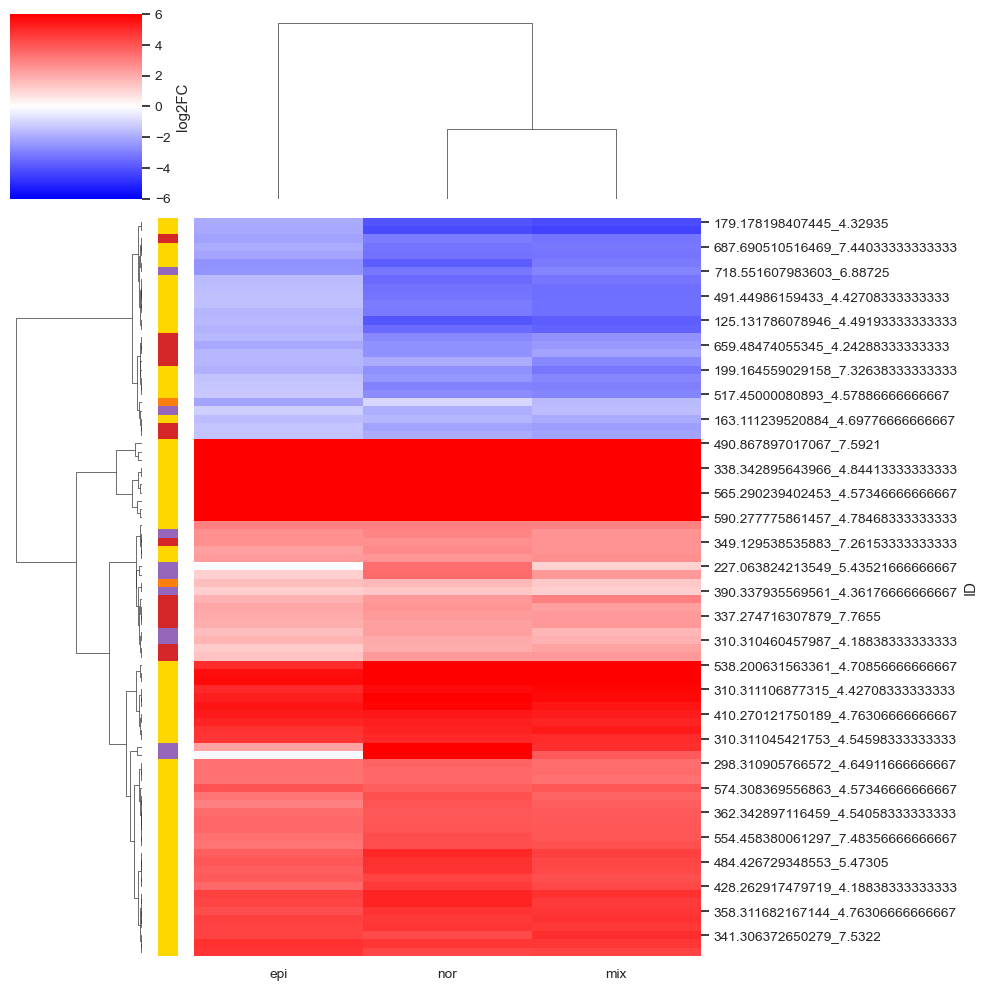

In [9]:
# generate the figure with metabolite names
linkage_method = 'ward'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(heatmap_df, 
                   cmap='bwr', 
                   row_cluster=True, col_cluster=True, 
                   method=linkage_method, metric=distance_metric, 
                   cbar_kws={'label':'log2FC'},
                   row_colors=k_colors,
                   vmin=-6, vmax=6
                  )

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()